In [1]:
# 출처: https://data-science.tistory.com/106

In [2]:
import tensorflow as tf
import numpy as np

# 데이터셋 로드
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.imdb.load_data(skip_top=20, num_words=200)
x_train_all.shape, y_train_all.shape, x_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [3]:
print(x_train_all[0])

[2, 2, 22, 2, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 2, 173, 36, 2, 2, 25, 100, 43, 2, 112, 50, 2, 2, 2, 35, 2, 2, 2, 150, 2, 172, 112, 167, 2, 2, 2, 39, 2, 172, 2, 2, 2, 2, 38, 2, 2, 2, 192, 50, 2, 2, 147, 2, 2, 2, 22, 2, 2, 2, 2, 2, 22, 71, 87, 2, 2, 43, 2, 38, 76, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 2, 2, 2, 2, 62, 2, 2, 2, 2, 2, 106, 2, 2, 2, 2, 2, 2, 66, 2, 33, 2, 130, 2, 2, 38, 2, 2, 25, 124, 51, 36, 135, 48, 25, 2, 33, 2, 22, 2, 2, 28, 77, 52, 2, 2, 2, 2, 82, 2, 2, 2, 107, 117, 2, 2, 2, 2, 2, 2, 2, 2, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 2, 2, 2, 2, 2, 104, 88, 2, 2, 2, 2, 98, 32, 2, 56, 26, 141, 2, 194, 2, 2, 2, 2, 22, 21, 134, 2, 26, 2, 2, 144, 30, 2, 2, 51, 36, 28, 2, 92, 25, 104, 2, 2, 65, 2, 38, 2, 88, 2, 2, 2, 2, 2, 2, 113, 103, 32, 2, 2, 2, 2, 178, 32]


In [4]:
# 2는 어휘 사전(bag of word)에 없는 단어(oov_char)
# 가장 많이 등장하는 영단어 20개를 건너뛰고 200개의 단어만 선택: skip_top, num_words 파라미터
# skip_top은 자주 등장하지만 정보를 제공하지 않는 단어(the, is 등)을 걸러냄 - oov_char로 대체
# num_words는 자주 등장하는 단어 상위 n개의 단어를 선택 -> 해당하지 않는 단어는 oov_char로 대체

In [5]:
# 2제외하기
for i in range(len(x_train_all)):
    x_train_all[i] = [w for w in x_train_all[i] if w > 2]

print(x_train_all[0])

[22, 43, 65, 66, 173, 36, 25, 100, 43, 112, 50, 35, 150, 172, 112, 167, 39, 172, 38, 192, 50, 147, 22, 22, 71, 87, 43, 38, 76, 22, 62, 106, 66, 33, 130, 38, 25, 124, 51, 36, 135, 48, 25, 33, 22, 28, 77, 52, 82, 107, 117, 36, 71, 43, 26, 46, 104, 88, 98, 32, 56, 26, 141, 194, 22, 21, 134, 26, 144, 30, 51, 36, 28, 92, 25, 104, 65, 38, 88, 113, 103, 32, 178, 32]


In [6]:
# 어휘 사전 내려받기
word_to_index = tf.keras.datasets.imdb.get_word_index()
word_to_index['movie'] # movie는 17에 대응되어 있음

17

In [7]:
index_to_word = {word_to_index[k]: k for k in word_to_index}

for w in x_train_all[0]:
    print(index_to_word[w-3], end=' ')

film just story really part they you could just being there an now same being director from same so fact there real film film were great just so much film would watch really at end so you know what they say if you at film have been good also two little they were just are out think because them all up are such big film but these are should be what they have don't you think story so because life after all us all 

In [8]:
np.random.seed(42)
random_index = np.random.permutation(25000)

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]


In [9]:
# 샘플의 길이 맞추기
maxlen = 200
x_train_seq = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = tf.keras.preprocessing.sequence.pad_sequences(x_val,maxlen=maxlen)
print(x_train_seq[0])
# 뒤에 0을 추가하면 성능이 감소함

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  35 129  40  27  28  40  22  83  31 103  85 116  45  24 196 159
  23  31 160  70  31 160  76 181  30 172  98  32  22 100  28  51  75 130
  56 105 186  30 168  33  97  53  38  46 117  53  74  31  35  23  34 167
  22  58]


In [10]:
x_train_onehot = tf.keras.utils.to_categorical(x_train_seq)
x_val_onehot = tf.keras.utils.to_categorical(x_val_seq)


In [13]:
# RNN 클래스 구성하기

class RecurrentNetwork:
    def __init__(self, n_cells=10, batch_size=32, learning_rate=0.1):
        self.n_cells = n_cells
        self.batch_size = batch_size
        self.w1h = None # 은닉 상태에 대한 가중치
        self.w1x = None # 입력에 대한 가중치
        self.b1 = None # 순환층의 절편(bias)
        self.w2 = None # 출력층의 가중치
        self.b2 = None # 출력층의 절편
        self.h = None # 순환층의 활성화 출력

        self.losses = [] # 훈련 손실
        self.val_losses = [] # 검증 손실
        self.lr = learning_rate # 학습률

    def forpass(self, x):
        self.h = [np.zeros((x.shape[0], self.n_cells))] # 은닉 상태 초기화
        # 배치 차원과 타임 스텝 차원을 바꿈
        seq = np.swapaxes(x, 0, 1)
        # 순환 층의 선형 식을 계산
        for x in seq:
            z1 = np.dot(x, self.w1x) + np.dot(self.h[-1], self.w1h) + self.b1
            h = np.tanh(z1) # 활성화 함수를 적용
            self.h.append(h) # 은닉상태 저장(역전파를 위함)
            z2 = np.dot(h, self.w2) + self.b2 # 출력층의 선형 식 계산
        return z2
    
    def backprop(self, x, err):
        m = len(x) # 샘플의 갯수

        # 출력층의 가중치와 절편에 대한 그래디언트 계산
        w2_grad = np.dot(self.h[-1].T, err) / m
        b2_grad = np.sum(err) / m
        # 배치 차원과 타임 스텝 차원을 바꿈
        seq = np.swapaxes(x, 0, 1)

        w1h_grad = w1x_grad = b1_grad = 0
        # 셀 직전까지 그래디언트 계산
        err_to_cell = np.dot(err, self.w2.T) * (1 - self.h[-1] ** 2)
        # 타임스텝을 거슬러가면서 그래디언트 전파
        for x, h in zip(seq[::-1][:10], self.h[:-1][::-1][:10]):
            w1h_grad += np.dot(h.T, err_to_cell)
            w1x_grad += np.dot(x.T, err_to_cell)
            b1_grad += np.sum(err_to_cell, axis=0)

            # 이전 타임 스텝의 셀 직전까지 그래디언트 계산
            err_to_cell = np.dot(err_to_cell, self.w1h) * (1-h ** 2)

        w1h_grad /= m
        w1x_grad /= m
        b1_grad /= m

        return w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad
    
    def sigmoid(self, z):
        z = np.clip(z, -100, None) # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))
        return a
    
    def init_weights(self, n_features, n_classes):
        orth_init = tf.initializers.Orthogonal()
        glorot_init = tf.initializers.GlorotUniform()

        self.w1h = orth_init((self.n_cells, self.n_cells)).numpy() # (셀 개수, 셀 개수)
        self.w1x = glorot_init((n_features, self.n_cells)).numpy() # (특성 개수, 셀 개수)
        self.b1 = np.zeros(self.n_cells)
        self.w2 = glorot_init((self.n_cells, n_classes)).numpy() # (셀 개수, 클래스 개수)
        self.b2 = np.zeros(n_classes)

    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)
        y_val = y_val.reshape(-1,1)
        np.random.seed(42)
        self.init_weights(x.shape[2], y.shape[1]) # 은닉층과 출력층의 가중치 초기화
        # epoch만큼 반복
        for i in range(epochs):
            print('에포크', i, end=' ')
            # 제너레이터 함수에서 반환한 미니배치 순환
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x, y):
                print('.', end='')
                a = self.training(x_batch, y_batch)
                # 안전한 로그 계산을 위해 클리핑
                a = np.clip(a, 1e-10, 1-1e-10)
                # 로그 손실과 규제 손실을 더해서 리스트에 추가
                loss = np.mean(-(y_batch * np.log(a) + (1-y_batch) * np.log(1-a)))
                batch_losses.append(loss)
            print()
            self.losses.append(np.mean(batch_losses))
            # 검증 세트에 대한 손실 계산
            self.update_val_loss(x_val, y_val)

    # 미니 배치 제너레이터 함수
    def gen_batch(self, x, y):
        length = len(x)
        bins = length // self.batch_size # 미니배치 갯수
        if length % self.batch_size:
            bins += 1 # 나누어 떨어지지 않을때 
        indexes = np.random.permutation(np.arange(len(x)))
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i+1)
            yield x[start:end], y[start:end] # batch_size만큼 슬라이싱하여 반환

    def training(self, x, y):
        m = len(x) # 샘플 갯수 저장
        z = self.forpass(x) # 정방향 계산 수행
        a = self.sigmoid(z) # 활성화 함수 적용
        err = -(y-a) # 오차 계산

        # 오차를 역전파하여 그래디언트 계산
        w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)

        # 셀의 가중치와 절편 업데이트
        self.w1h -= self.lr * w1h_grad
        self.w1x -= self.lr * w1x_grad
        self.b1 -= self.lr * b1_grad
        # 출력층의 가중치와 절편 업데이트
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad

        return a
    
    def predict(self, x):
        z = self.forpass(x) # 정방향 계산 수행
        return z > 0 # 스텝 함수 적용
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교해서 true의 비율을 반환
        return np.mean(self.predict(x) == y.reshape(-1,1))
    
    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val) # 정방향 계산 수행
        a = self.sigmoid(z)
        a = np.clip(a, 1e-10, 1-1e-10) # 출력값 클리핑
        val_loss = np.mean(-(y_val * np.log(a) + (1-y_val) * np.log(1-a)))
        self.val_losses.append(val_loss)

In [14]:
rn = RecurrentNetwork(n_cells=32, batch_size=32, learning_rate=0.01)
rn.fit(x_train_onehot, y_train, epochs=20, x_val=x_val_onehot, y_val=y_val)

c:\Users\c\anaconda3\envs\tf\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


에포크 0 .................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 ..........................................................................................................................................................................................................................................................................................................................................................................

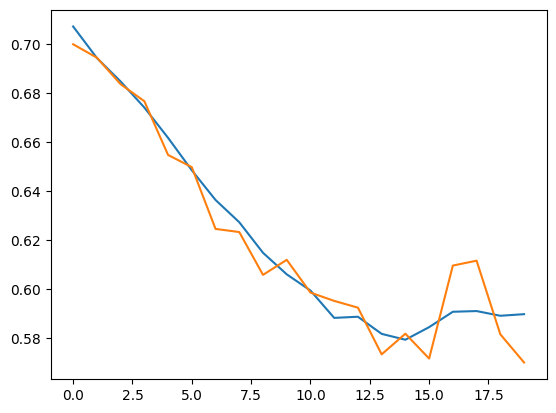

In [15]:
import matplotlib.pyplot as plt
plt.plot(rn.losses)
plt.plot(rn.val_losses)
plt.show()

In [16]:
rn.score(x_val_onehot, y_val)

0.7052